## 4. Model - Artificial Neural Networks (ANN) 

In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn-v0_8-dark') 
import warnings
warnings.filterwarnings('ignore')   

#### 1. Fetching Data

In [2]:
start_date = '2018-01-01'
end_date = '2019-09-01' 

assets = 'BTC-USD'

In [3]:
btc_adjClose = pd.DataFrame() 

btc_adjClose['Adj_Close'] = yf.download('BTC-USD',start=start_date,end=end_date)['Adj Close'] 

[*********************100%%**********************]  1 of 1 completed


#### 2. Splitting data into training and testing dataset

In [4]:
btc_train = btc_adjClose[:487] 
btc_test = btc_adjClose[486:] 

print(f'Shape of train after splitting : {btc_train.shape}') 
print(f'Shape of test after splitting : {btc_test.shape}') 

Shape of train after splitting : (487, 1)
Shape of test after splitting : (122, 1)


#### 3. Scaling the data for training and testing

In [5]:
from sklearn.preprocessing import MinMaxScaler  
np.random.seed(0) 
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(btc_adjClose)    

#### 4. Reshaping the scaled data for ANN Network

In [6]:
x_train, y_train = [],[] 
for i in range(80,len(btc_train)):
    x_train.append(scaled_data[i-80:i,0]) 
    y_train.append(scaled_data[i,0]) 
x_train, y_train = np.array(x_train), np.array(y_train) 

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1])) 
print('Shape of x_train: ',x_train.shape)
print('Shape of y_train: ',y_train.shape) 

Shape of x_train:  (407, 80)
Shape of y_train:  (407,)


#### 5. Defining ANN Network 

In [7]:
from keras.models import Sequential 
from keras.layers import Dense

In [8]:
model = Sequential() 
model.add(Dense(units=13,kernel_initializer='uniform',activation='relu',input_dim=80)) 
model.add(Dense(units=13,kernel_initializer='uniform',activation='relu')) 
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) 
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])  
model.summary() 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                1053      
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 6. Training the model

In [9]:
model.fit(x_train,y_train,batch_size=1,epochs=13,verbose=2) 

Epoch 1/13


407/407 - 2s - loss: 0.0569 - accuracy: 0.0025 - 2s/epoch - 4ms/step
Epoch 2/13
407/407 - 1s - loss: 0.0364 - accuracy: 0.0025 - 624ms/epoch - 2ms/step
Epoch 3/13
407/407 - 1s - loss: 0.0250 - accuracy: 0.0025 - 568ms/epoch - 1ms/step
Epoch 4/13
407/407 - 1s - loss: 0.0127 - accuracy: 0.0025 - 574ms/epoch - 1ms/step
Epoch 5/13
407/407 - 1s - loss: 0.0054 - accuracy: 0.0025 - 572ms/epoch - 1ms/step
Epoch 6/13
407/407 - 1s - loss: 0.0032 - accuracy: 0.0025 - 580ms/epoch - 1ms/step
Epoch 7/13
407/407 - 1s - loss: 0.0024 - accuracy: 0.0025 - 577ms/epoch - 1ms/step
Epoch 8/13
407/407 - 1s - loss: 0.0018 - accuracy: 0.0025 - 573ms/epoch - 1ms/step
Epoch 9/13
407/407 - 1s - loss: 0.0014 - accuracy: 0.0025 - 578ms/epoch - 1ms/step
Epoch 10/13
407/407 - 1s - loss: 0.0011 - accuracy: 0.0025 - 573ms/epoch - 1ms/step
Epoch 11/13
407/407 - 1s - loss: 9.6186e-04 - accuracy: 0.0025 - 577ms/epoch - 1ms/step
Epoch 12/13
407/407 - 1s - loss: 8.5211e-04 - accuracy: 0.0025 - 577ms/epoch - 1ms

#### 7. Prediction using Trained ANN Model

In [10]:
inputsB = btc_adjClose[len(btc_adjClose)-len(btc_test)-80:].values 
inputsB = inputsB.reshape(-1,1) 
inputsB = scaler.transform(inputsB) 
len(inputsB) 

202

In [11]:
x_test = []
for i in range(80,inputsB.shape[0]):
    x_test.append(inputsB[i-80:i,0]) 
x_test = np.array(x_test) 
print('Before: ',x_test.shape) 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1])) 
print('After: ',x_test.shape) 
closing_price = model.predict(x_test) 
closing_price = scaler.inverse_transform(closing_price)     

Before:  (122, 80)
After:  (122, 80)
4/4 [==============================] - 0s 3ms/step


#### 8. Evaluating the predictions 

In [12]:
# RMSE for ANN
rmse = np.sqrt(np.mean(np.power((btc_test['Adj_Close'].values-closing_price),2))) 
print(f'RMSE for ANN : {rmse:.6f}') 

# MAPE for ANN 

mape = np.mean(np.abs(closing_price-btc_test['Adj_Close'].values)/np.abs(btc_test['Adj_Close'].values)) 
print(f'MAPE for ANN : {mape:.6f}') 

# MPE for ANN 

mpe = np.mean((closing_price-btc_test['Adj_Close'].values)/btc_test['Adj_Close'].values) 
print(f'MPE for ANN : {mpe:.6f}') 

RMSE for ANN : 2337.947867
MAPE for ANN : 0.200044
MPE for ANN : -0.081550


#### 9. Correlation between actual values and predicted via ANN

In [13]:
btc_test['ANN_Predictions'] = closing_price 

corr_ANN = np.corrcoef(btc_test['ANN_Predictions'].dropna().values, btc_test['Adj_Close'].dropna().values)[0,1] 
print(f'Correlation between ANN and actual values : {corr_ANN*100:.2f}%') 

Correlation between ANN and actual values : 86.27%


#### 10. Plotting the predictions from ANN w.r.t Test values

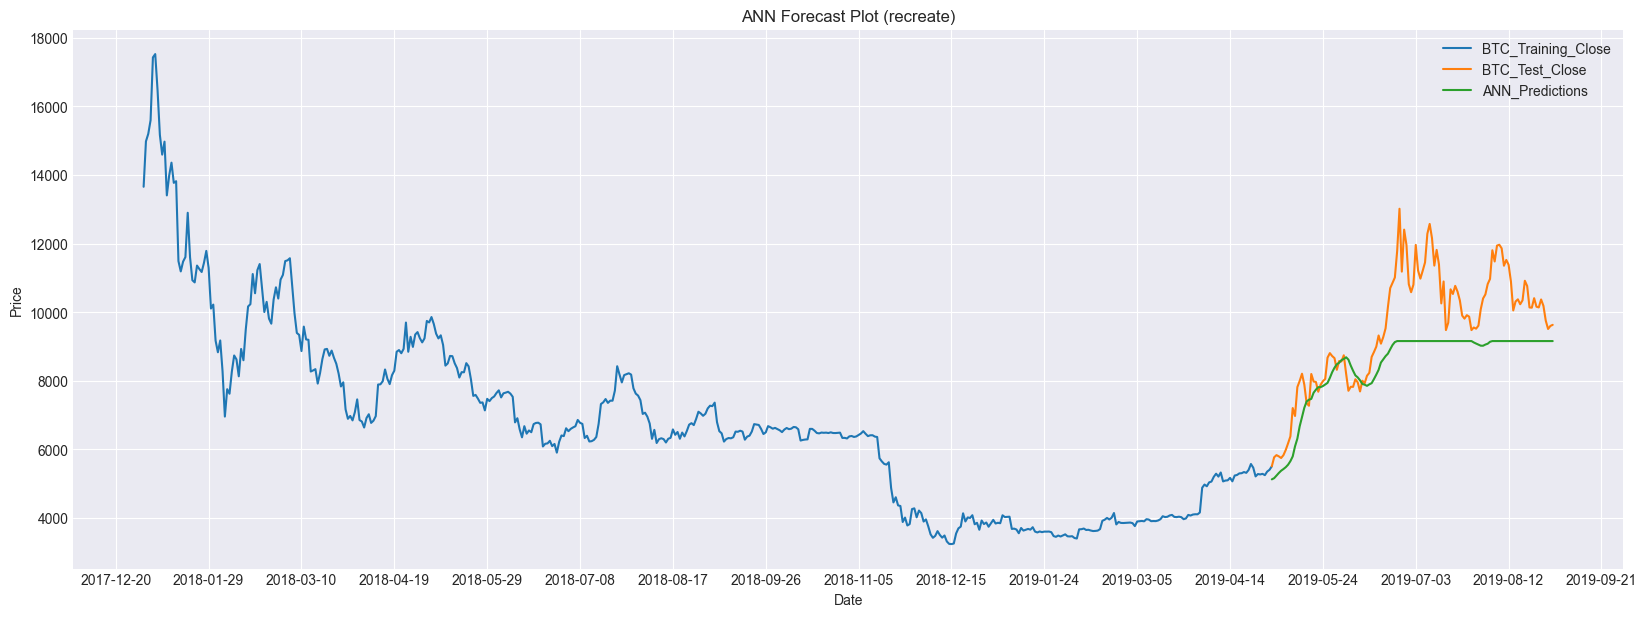

In [14]:
plt.figure(figsize=(20,7)) 
ax = plt.axes() 
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.plot(btc_train['Adj_Close'],label='BTC_Training_Close')
plt.plot(btc_test['Adj_Close'],label='BTC_Test_Close')
plt.plot(btc_test['ANN_Predictions'],label='ANN_Predictions') 
plt.xlabel('Date') 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.ylabel('Price') 
plt.title('ANN Forecast Plot (recreate)') 
ax.grid(True) 
plt.legend(loc='best') 
plt.show() 